# Customer Segmentation and Analysis

#### The available features(columns) in the dataset: 
- order_number
- order_date
- customer_number
- type, month
- item_number (SKU)
- quantity
- category
- revenue
- customer_source
- order_source

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [102]:
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

## Data Preparation and Exploration

#### Read the dataset

In [103]:
df= pd.read_csv('data/sales.csv')

# Display the first few rows of the DataFrame
print(df.head())

  order_number  order_date customer_number       type    month item_number  \
0       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0895   
1       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE1000   
2       KE0001  2024-01-01         CKE0539     RETAIL  2024-01      KE0921   
3       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0015   
4       KE0002  2024-01-01         CKE0580  WHOLESALE  2024-01      KE0224   

   quantity       category    revenue customer_source order_source  
0        12       DIABETES   5.098618          direct          App  
1        23  HYPERTENSIVES  12.460205          direct          App  
2        12  HYPERTENSIVES   8.012194          direct          App  
3        23       DIABETES  13.854194           agent         call  
4        21  HYPERTENSIVES  10.534678           agent         call  


#### check for missing values

In [104]:
print(df.isnull().sum())

order_number       0
order_date         0
customer_number    0
type               0
month              0
item_number        0
quantity           0
category           0
revenue            0
customer_source    0
order_source       0
dtype: int64


#### check the data types of the columns

In [105]:
print(df.dtypes)

order_number        object
order_date          object
customer_number     object
type                object
month               object
item_number         object
quantity             int64
category            object
revenue            float64
customer_source     object
order_source        object
dtype: object


#### convert the order_date and month columns to datetime format

In [106]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['month'] = pd.to_datetime(df['month'])
df.dtypes

order_number               object
order_date         datetime64[ns]
customer_number            object
type                       object
month              datetime64[ns]
item_number                object
quantity                    int64
category                   object
revenue                   float64
customer_source            object
order_source               object
dtype: object

#### unique values in each column

In [107]:
print(df.nunique())

order_number       20600
order_date           206
customer_number     1000
type                   2
month                  7
item_number         1000
quantity              36
category               2
revenue            61800
customer_source        2
order_source           5
dtype: int64


#### Observations: 
There are a total of
- 1000 unique customers
- 1000 unique items
- 2 categories

### Exploratory Data Analysis

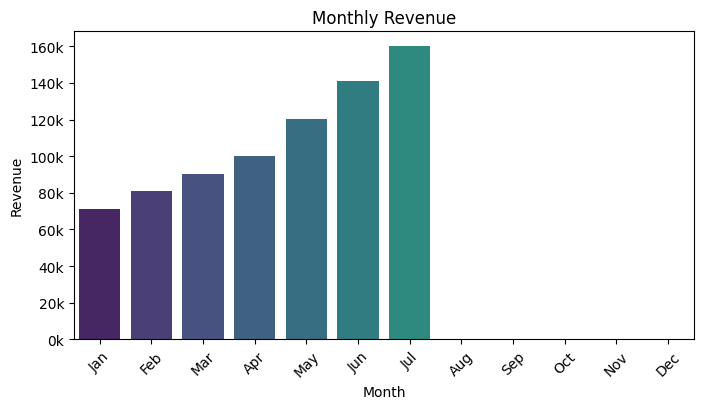

In [108]:
df['month'] = df['order_date'].dt.month
month_abbr = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
df['month_abbr'] = df['month'].map(month_abbr)

# Aggregate monthly revenue
monthly_revenue = df.groupby('month_abbr')['revenue'].sum().reset_index()

# Define a categorical type for the month_abbr to ensure proper sorting
monthly_revenue['month_abbr'] = pd.Categorical(monthly_revenue['month_abbr'], 
                                               categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], 
                                               ordered=True)

# Sort by the 'month_abbr' column
monthly_revenue = monthly_revenue.sort_values(by='month_abbr')

# Plot monthly revenue
plt.figure(figsize=(8, 4))
sns.barplot(x='month_abbr', y='revenue', data=monthly_revenue, palette='viridis')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title('Monthly Revenue')

# Format y-label as shortened form
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x/1000)}k'))

plt.xticks(rotation=45)
plt.show()

#### Observation:

- The revenue seems to be increasing over the months.
- Larger jumps starting from May.

### Feature Engineering to create more meaningful features

- Feature Engineering is the process of creating new features from the existing features in the dataset. 
- This helps us analyse the data better as the new features are more meaningful.
- Example: average revenue per category, top 10 products, etc.

In [109]:
# Top 10 performing products by revenue
top_10_products = df.groupby('item_number')['revenue'].sum().nlargest(10).reset_index()

# Average revenue by category
avg_revenue_category = df.groupby('category')['revenue'].mean().reset_index()

# Average revenue by type
avg_revenue_type = df.groupby('type')['revenue'].mean().reset_index()

# Average revenue by customer source
avg_revenue_customer_source = df.groupby('customer_source')['revenue'].mean().reset_index()

# Average revenue by order source
avg_revenue_order_source = df.groupby('order_source')['revenue'].mean().reset_index()

### Visualizing the engineered features

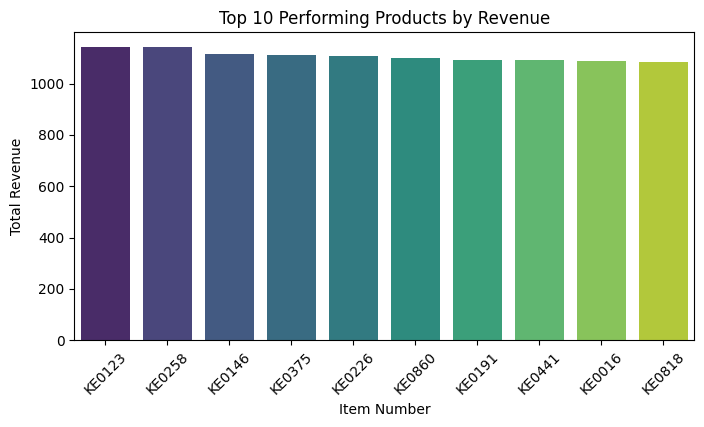

In [110]:

# Bar chart for Top 10 performing products
plt.figure(figsize=(8, 4))
sns.barplot(x='item_number', y='revenue', data=top_10_products, palette='viridis')
plt.title('Top 10 Performing Products by Revenue')
plt.xlabel('Item Number')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

#### Observation:
The top performing products seem to be generating the similar amount of revenue.

Now, let's see how much percent of total revenue is contributed by the top 10 products

In [111]:

top_10_revenue = top_10_products['revenue'].sum()
total_revenue = df['revenue'].sum()

print(f'Top 10 products contribute {top_10_revenue/total_revenue:.2%} to the total revenue')

Top 10 products contribute 1.45% to the total revenue


1.45% of total revenue isn't a significant amount, indicating that these products do not dominate the overall sales.

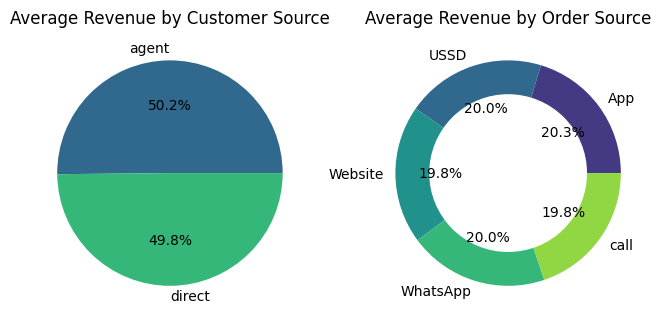

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Customer Source
axes[0].pie(avg_revenue_customer_source['revenue'], labels=avg_revenue_customer_source['customer_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Customer Source')

# Donut chart for Average Revenue by Order Source
axes[1].pie(avg_revenue_order_source['revenue'], labels=avg_revenue_order_source['order_source'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 5))
axes[1].set_title('Average Revenue by Order Source')
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


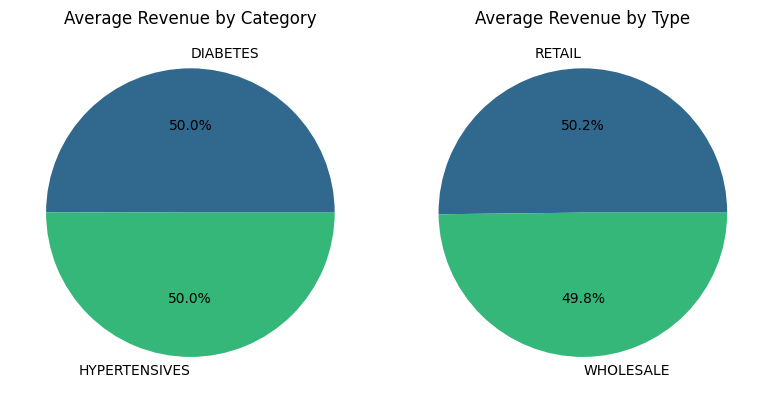

In [113]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# Pie chart for Average Revenue by Category
axes[0].pie(avg_revenue_category['revenue'], labels=avg_revenue_category['category'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[0].set_title('Average Revenue by Category')

# Pie chart for Average Revenue by Type
axes[1].pie(avg_revenue_type['revenue'], labels=avg_revenue_type['type'], autopct='%1.1f%%', colors=sns.color_palette('viridis', 2))
axes[1].set_title('Average Revenue by Type')

plt.tight_layout()
plt.show()


#### Observation:

The distribution of revenue seems to be almost equally spread among Categories, Types, Customer and Order sources.

#### Count of orders by category

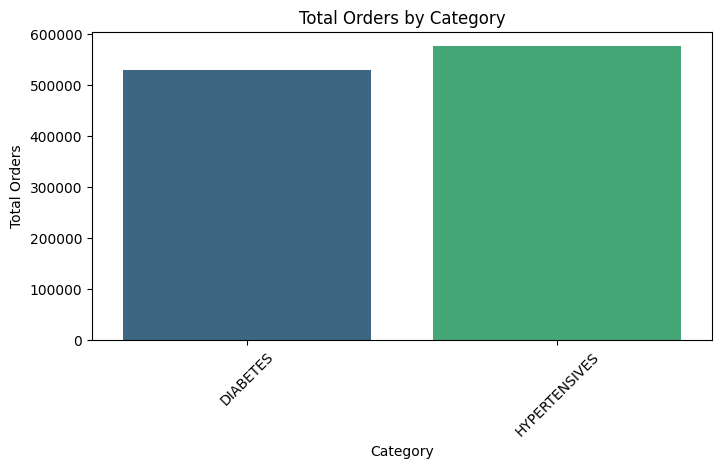

In [114]:

category_counts = df.groupby('category')['quantity'].sum()

# Plot the count of orders by category
plt.figure(figsize=(8, 4))
sns.barplot(x=category_counts.index, y=category_counts, palette='viridis')
plt.title('Total Orders by Category')
plt.xlabel('Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()


#### Observation:
- Despite DIABETES and HYPERTENSIVES products generating same revenue, the number of HYPERTENSIVES products sold is more than DIABETES products.
- This insight suggests that DIABETES products being purchased are more expensive than HYPERTENSIVES products.

In [115]:
total_products_sold = df.groupby('category')['quantity'].sum()
print(total_products_sold)

category
DIABETES         527868
HYPERTENSIVES    574875
Name: quantity, dtype: int64


- HYPERTENSIVES products seem to be more popular among customers with a lead of around 50000 products sold in last 7 months.

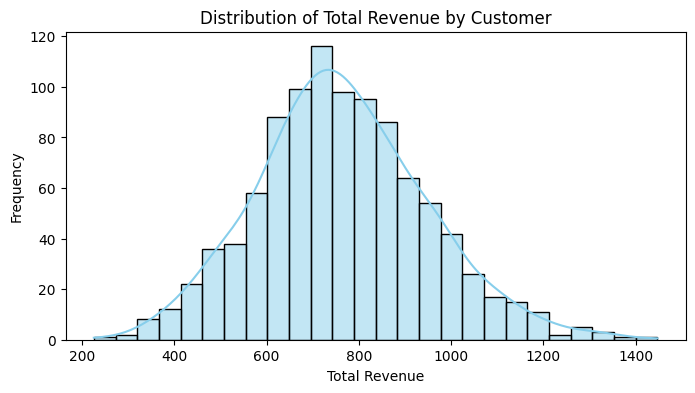

In [116]:
# Calculate total revenue for each customer
total_revenue = df.groupby('customer_number')['revenue'].sum().reset_index()
total_revenue.columns = ['customer_number', 'total_revenue']

# Distribution Plot
plt.figure(figsize=(8, 4))
sns.histplot(total_revenue['total_revenue'], kde=True, color='skyblue')
plt.title('Distribution of Total Revenue by Customer')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

### Observations: 

***Normal Distribution*** 
- It's a near normal distribution. 
- Short Definition: Mean(Avg) in the middle, symmetric, and bell-shaped.
- In our case the average spending is around $700 to $800 mark.

***Revenue Spread***
- Significant spread from $200 to $1400.
- Indicates a diverse range of customer spending.

***High-Value Customers/Outliers***
- Higher end tail represents high-value customers. 
- Might be B2B customers or customers who buy in bulk.

Note: Currency assumed to be dollars for the sake of presentation.

##### Calculate recency for each customer

Recency is the number of days since the last purchase made by the customer.

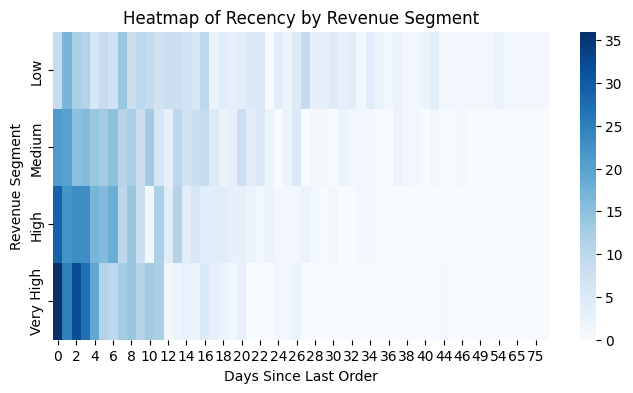

In [117]:
recency = df.groupby('customer_number')['order_date'].max().reset_index()
recency['recency'] = (df['order_date'].max() - recency['order_date']).dt.days
recency = recency.drop('order_date', axis=1)


# Heatmap of Recency by Revenue Segment
recency = pd.merge(recency, total_revenue, on='customer_number')
recency['revenue_segment'] = pd.qcut(recency['total_revenue'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

plt.figure(figsize=(8, 4))
sns.heatmap(recency.pivot_table(index='revenue_segment', columns='recency', aggfunc='size', fill_value=0), cmap='Blues')
plt.title('Heatmap of Recency by Revenue Segment')
plt.xlabel('Days Since Last Order')
plt.ylabel('Revenue Segment')
plt.show()


#### Observation:

- Two factors to consider here. Revenue and no of users falling in each revenue segment.
- It is clear that many users keep purchasing on a regular basis which can be seen in the bottom left corner of the graph.
- As we move towards right, the customers appear on the Low revenue segment.

#### Question to ourselves:

- What actions need to be taken to ensure that customers with low recency and revenue generation are retained?


### Customer Retention Analysis

- Customer rentention is the ability of a company to retain its customers over some specified period.
- This reflects customer loyalty and satisfaction.

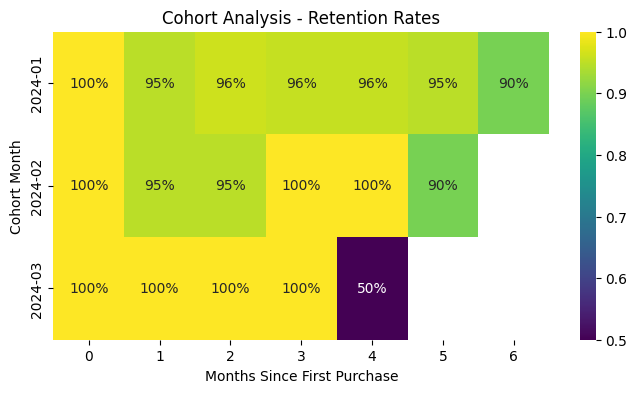

In [118]:
from operator import attrgetter
# Cohort Analysis
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.to_period('M')
df['cohort'] = df.groupby('customer_number')['order_date'].transform('min').dt.to_period('M')

cohort_data = df.groupby(['cohort', 'order_month']).agg({
    'customer_number': 'nunique',
    'order_number': 'count',
    'revenue': 'sum'
}).reset_index()

cohort_data['cohort_index'] = (cohort_data['order_month'] - cohort_data['cohort']).apply(attrgetter('n'))

# Pivot table to visualize cohort retention
cohort_pivot = cohort_data.pivot_table(index='cohort', columns='cohort_index', values='customer_number')
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

import seaborn as sns
plt.figure(figsize=(8, 4))
sns.heatmap(retention_matrix, annot=True, fmt='.0%', cmap='viridis')
plt.title('Cohort Analysis - Retention Rates')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.show()

#### Observations:
- ***High Retention in Initial Months***: Retention rates remain strong during the first few months across cohorts.
- ***Drop in Retention***: There’s a noticeable drop to 50% retention in the fourth month for the March 2024 cohort

#### Question to ourselves:
- What might be the reason for the significant drop in retention rate?
- This question might be better answered with more business context.

### Creating new dataframe with engineered features for customer analysis

In [119]:

avg_order_value = df.groupby('customer_number')['revenue'].mean().reset_index()
avg_order_value.columns = ['customer_number', 'avg_order_value']
total_quantity = df.groupby('customer_number')['quantity'].sum().reset_index()
total_quantity.columns = ['customer_number', 'total_quantity']


# Merge all features into a single DataFrame
customer_data = total_revenue.merge(avg_order_value, on='customer_number')
customer_data = customer_data.merge(total_quantity, on='customer_number')
customer_data = customer_data.merge(recency, on='customer_number')
customer_data['total_revenue'] = customer_data['total_revenue_x']
customer_data = customer_data.drop(['total_revenue_x', 'total_revenue_y'], axis=1)

# Display the aggregated data
print(customer_data.shape)
print(customer_data.head())


(1000, 6)
  customer_number  avg_order_value  total_quantity  recency revenue_segment  \
0         CKE0001        14.970989            1239        1       Very High   
1         CKE0002        14.078982            1310        1       Very High   
2         CKE0003        12.771088            1329        9       Very High   
3         CKE0004        13.817531            1546        5       Very High   
4         CKE0005        12.593713            1049       17            High   

   total_revenue  
0     898.259321  
1     971.449778  
2     919.518332  
3    1119.219980  
4     755.622781  


### Creating a Customer Segmentation Model using KMeans Clustering

#### What is Customer Segmentation?

- Process of dividing customers into groups based on common characteristics.

#### Why is Customer Segmentation important?

- Helps in understanding the customer base better.
- Helps in creating targeted marketing strategies.
- Helps in improving customer service.

Note: In data science, we use clustering algorithms to segment customers.

#### KMeans Clustering

- Grouping Similar Data: K-Means is an algorithm that groups similar data points together into clusters based on their features, like grouping customers by spending habits.
- We have to first decide the number of clusters we want to create. 
- For each cluster/segment, the algorithm identifies a central point (centroid), which represents the “average” of that group.

#### Why KMeans Clustering?

- Simple and easy to implement.
- Efficient and fast. Scales well to large datasets.

#### Select features/characterstics for clustering


In [120]:
features = customer_data[['total_revenue', 'avg_order_value', 'total_quantity', 'recency']]

# Normalize the features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

#### So how do we decide the number of clusters?

- Elbow Method: It calculates the sum of squared distances between each data point and the centroid of the cluster and then plots it against the number of clusters.

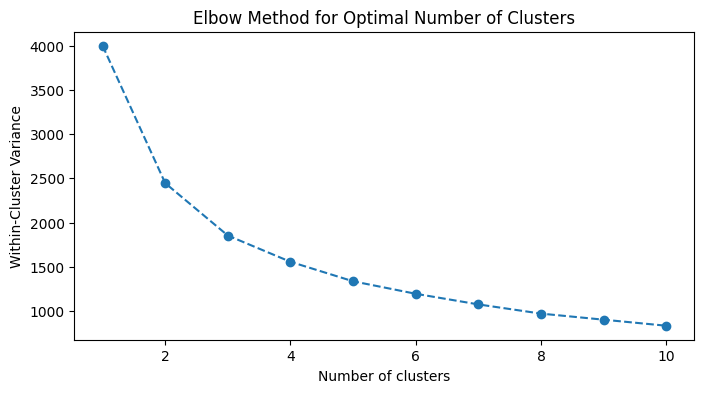

In [121]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_features)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Variance')
plt.show()

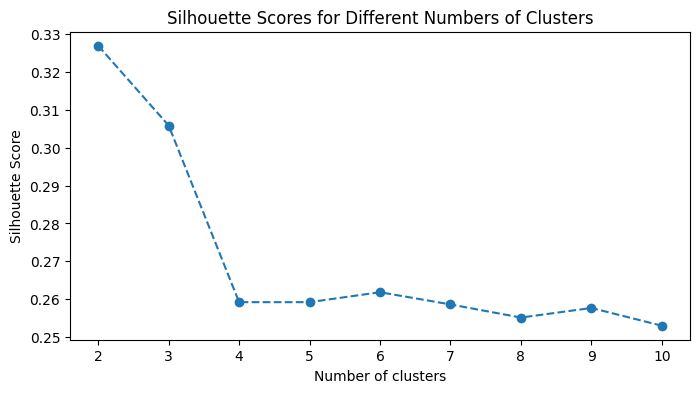

In [122]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features)
    silhouette_avg = silhouette_score(normalized_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Silhouette Score measures how similar an object is to its cluster compared to other clusters. 
- Higher the Silhouette Score, better the clustering.

In [123]:
from sklearn.cluster import KMeans

# Applying K-means with 3 clusters
optimal_clusters = 3
kmeans_3 = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
customer_data['cluster_3'] = kmeans_3.fit_predict(normalized_features)

# cluster numbers should start from 1
customer_data['cluster_3'] = customer_data['cluster_3'] + 1


In [124]:
# Analyze the characteristics of each cluster (3 clusters)
cluster_summary_3 = customer_data.groupby('cluster_3').agg({
    'total_revenue': ['mean', 'sum'],
    'avg_order_value': 'mean',
    'total_quantity': 'mean',
    'recency': 'mean',
    'customer_number': 'count'
}).reset_index()

# Flatten the MultiIndex columns
cluster_summary_3.columns = ['cluster', 'avg_total_revenue', 'sum_total_revenue', 'avg_order_value', 'avg_total_quantity', 'avg_recency', 'customer_count']


### Visualizing the clusters and their characteristics

Text(0, 0.5, 'Number of Customers')

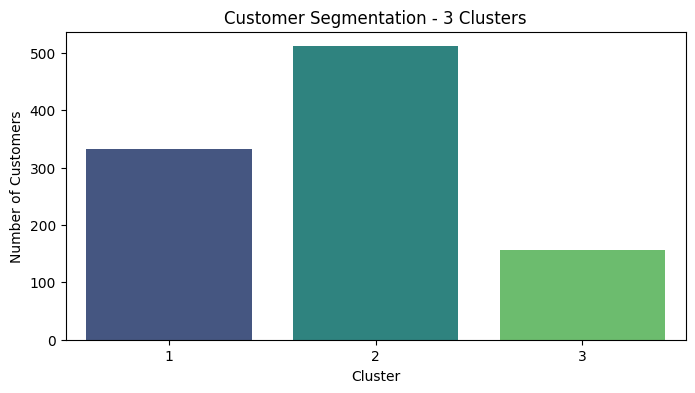

In [125]:
# No. of customers in the clusters
plt.figure(figsize=(8, 4))
sns.countplot(data=customer_data, x='cluster_3', palette='viridis')
plt.title('Customer Segmentation - 3 Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')

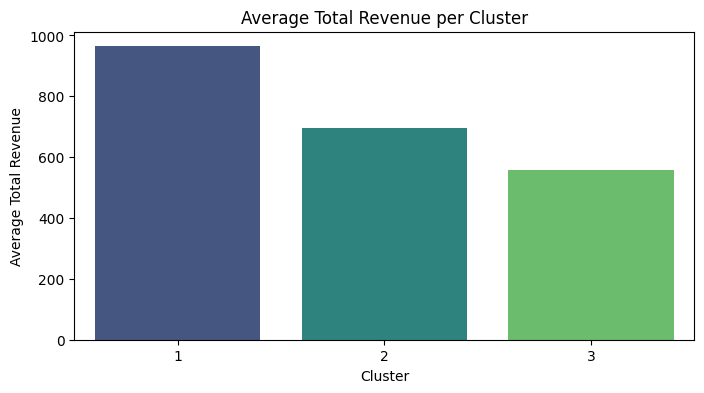

In [126]:
# Bar plot for average total revenue per cluster
plt.figure(figsize=(8, 4))
sns.barplot(x='cluster', y='avg_total_revenue', data=cluster_summary_3, palette='viridis')
plt.title('Average Total Revenue per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Total Revenue')
plt.show()

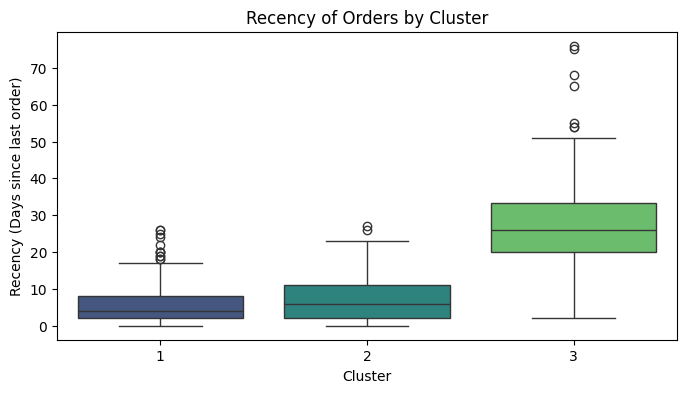

In [127]:
# Box plot for recency by cluster
plt.figure(figsize=(8, 4))
sns.boxplot(x='cluster_3', y='recency', data=customer_data, palette='viridis')
plt.title('Recency of Orders by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Recency (Days since last order)')
plt.show()

In [128]:
# Display the cluster summary
print(cluster_summary_3)

   cluster  avg_total_revenue  sum_total_revenue  avg_order_value  \
0        1         963.894648      320976.917771        13.249236   
1        2         696.060217      355686.770738        12.234065   
2        3         557.540458       86976.311491        10.764238   

   avg_total_quantity  avg_recency  customer_count  
0         1379.237237     5.498498             333  
1         1007.602740     7.287671             511  
2          824.179487    27.237179             156  


#### Outliers present in the data can skew some of the results. Discussion with stakeholders is necessary to decide how to handle them.

## Individual Cluster Analysis and Tailoring Marketing Strategies

### Cluster 1:

- Average Total Revenue: $969.89
- Sum Total Revenue: $320,976.92
- Average Order Value: $13.25
- Average Total Quantity: 1,379.24
- Average Recency: 5.50 days
- Customer Count: 333

#### Analysis

- High-value customers with high revenue and quantity.
- These customers are highly engaged with frequent purchases.

#### Marketing Strategy

- Upsell and cross-sell products to increase revenue because these customers are already engaged.
- Offer loyalty programs to enourage continued frequent purchases.

====================================================================================================

### Cluster 2:

- Average Total Revenue: $696.06
- Sum Total Revenue: $355,686.77
- Average Order Value: $12.23
- Average Total Quantity: 1,007.60
- Average Recency: 7.29 days
- Customer Count: 511

#### Analysis

- Moderate spending customers with steady purchases.
- These customers are less frequent than Cluster 1 but still show regular engagement.

#### Marketing Strategy

- Implementing some sort of rentention campaign to make sure we keep these customers engaged.
- Referral programs. Although seems like it should be general strategy, it can be more targeted towards these customers.

====================================================================================================


### Cluster 3:

- Average Total Revenue: $557.54
- Sum Total Revenue: $86,976.31
- Average Order Value: $10.76
- Average Total Quantity: 824.18
- Average Recency: 27.24 days
- Customer Count: 156

#### Analysis

- Low spending customers who are also less frequent.
- These customers are at a higher risk of churning. (Churn: When a customer stops purchasing from a business)

#### Marketing Strategy

- Gather feedback maybe through surveys(with well framed questions) to understand why these customers are not purchasing frequently.
- Launching a re-engagement campaign with special offers and discounts.


====================================================================================================

### APPENDIX

#### This section contains some additional analysis and insights that were not included in the presentation.

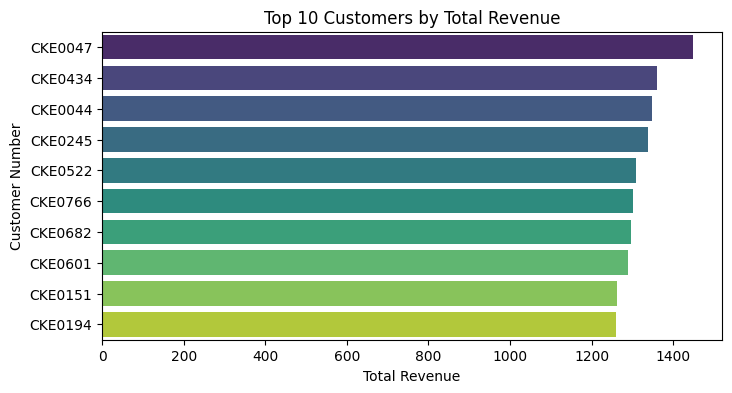

In [129]:
total_revenue = df.groupby('customer_number')['revenue'].sum().reset_index()
total_revenue.columns = ['customer_number', 'total_revenue']

# Top N Bar Chart (Top 10 Customers)
top_n_customers = total_revenue.nlargest(10, 'total_revenue')
plt.figure(figsize=(8, 4))
sns.barplot(x='total_revenue', y='customer_number', data=top_n_customers, palette='viridis')
plt.title('Top 10 Customers by Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer Number')
plt.show()

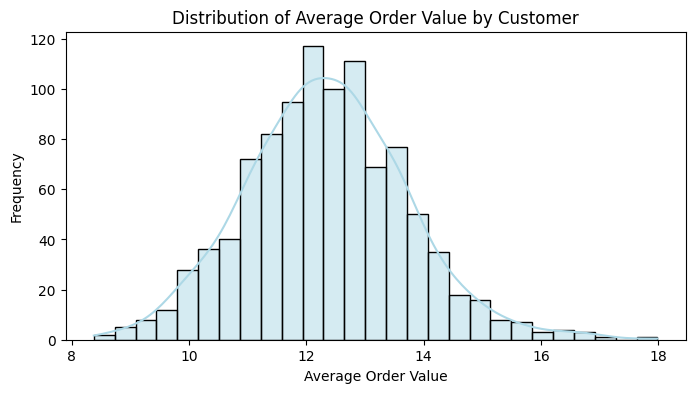

In [130]:
# Calculate average order value for each customer
avg_order_value = df.groupby('customer_number')['revenue'].mean().reset_index()
avg_order_value.columns = ['customer_number', 'avg_order_value']

# Distribution Plot
plt.figure(figsize=(8, 4))
sns.histplot(avg_order_value['avg_order_value'], kde=True, color='lightblue')
plt.title('Distribution of Average Order Value by Customer')
plt.xlabel('Average Order Value')
plt.ylabel('Frequency')
plt.show()

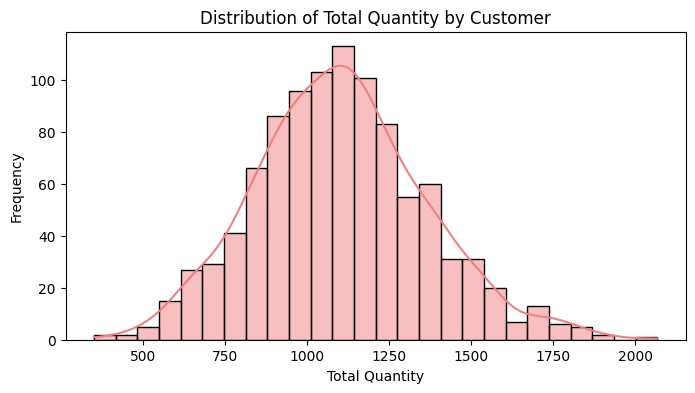

In [131]:
# Calculate total quantity for each customer
total_quantity = df.groupby('customer_number')['quantity'].sum().reset_index()
total_quantity.columns = ['customer_number', 'total_quantity']

# Distribution Plot
plt.figure(figsize=(8, 4))
sns.histplot(total_quantity['total_quantity'], kde=True, color='lightcoral')
plt.title('Distribution of Total Quantity by Customer')
plt.xlabel('Total Quantity')
plt.ylabel('Frequency')
plt.show()


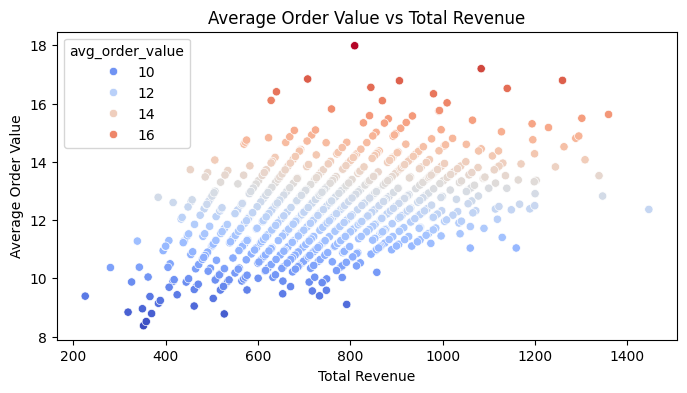

In [132]:
# Scatter Plot (Average Order Value vs Total Revenue)
merged_data = pd.merge(total_revenue, avg_order_value, on='customer_number')
plt.figure(figsize=(8, 4))
sns.scatterplot(x='total_revenue', y='avg_order_value', data=merged_data, hue='avg_order_value', palette='coolwarm')
plt.title('Average Order Value vs Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Average Order Value')
plt.show()

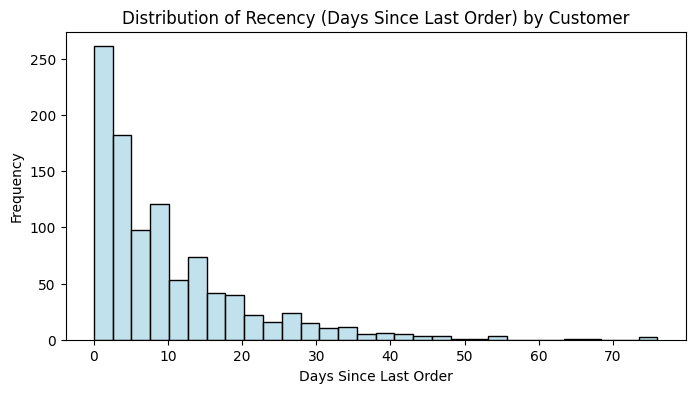

In [133]:

# Histogram
plt.figure(figsize=(8, 4))
sns.histplot(recency['recency'], bins=30, color='lightblue')
plt.title('Distribution of Recency (Days Since Last Order) by Customer')
plt.xlabel('Days Since Last Order')
plt.ylabel('Frequency')
plt.show()

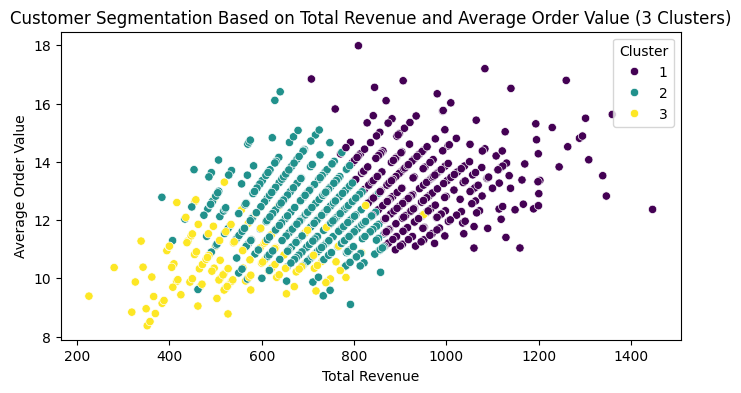

In [134]:

# (Total Revenue vs. Average Order Value) for 3 clusters
plt.figure(figsize=(8, 4))
sns.scatterplot(x='total_revenue', y='avg_order_value', hue='cluster_3', data=customer_data, palette='viridis')
plt.title('Customer Segmentation Based on Total Revenue and Average Order Value (3 Clusters)')
plt.xlabel('Total Revenue')
plt.ylabel('Average Order Value')
plt.legend(title='Cluster')
plt.show()

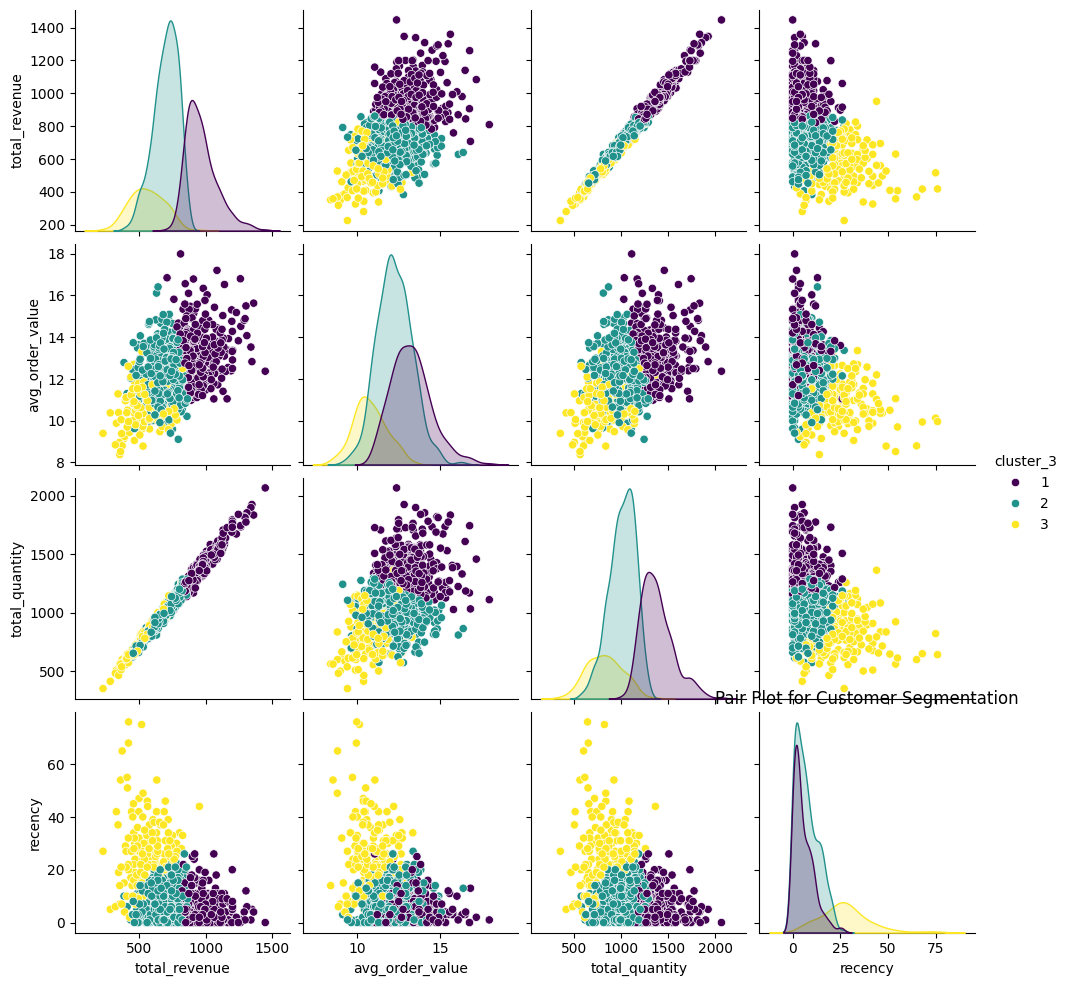

In [135]:
# extract non categorical columns
non_categorical = customer_data[['total_revenue', 'avg_order_value', 'total_quantity', 'recency', 'cluster_3']]
# pair plot for non_categorical columns
sns.pairplot(non_categorical, hue='cluster_3', palette='viridis')
plt.title('Pair Plot for Customer Segmentation')
plt.show()